<a href="https://colab.research.google.com/github/chirag1701/ENSO_waters_solubility/blob/main/ENSO_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision


In [2]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

2.3.0+cpu
None
Python 3.10.12
/bin/bash: line 1: nvidia-smi: command not found


In [3]:
#@title
# This code is for installing RDkit library that handles molecule data
import sys   # to interact with system python
import os    # to interact with system-level commands
import requests  # http requests
import subprocess  # Run external commands and processes
import shutil      # to perform high-level file operations
from logging import getLogger, StreamHandler, INFO

In [4]:
logger = getLogger(__name__)  # __ __ for internal command
logger.addHandler(StreamHandler())
logger.setLevel(INFO)     # only log messages with a severity level of INFO or higher will be recorded

In [5]:
!apt-get install -y libboost-all-dev
!apt-get install -y libeigen3-dev
!apt-get install -y python3-pyqt5
!apt-get install -y python3-venv
!apt-get install -y python3-pyqt5.qtopengl
!apt-get install -y python3-pyqt5.qtsvg
!apt-get install -y libsqlite3-dev

!pip install rdkit-pypi


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  libeigen3-doc libmpfrc++-dev
The following NEW packages will be installed:
  libeigen3-dev
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,056 kB of archives.
After this operation, 9,081 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeigen3-dev all 3.4.0-2ubuntu2 [1,056 kB]
Fetched 1,056 kB in 1s (964 kB/s)
Selecting previously unselected package libeigen3-dev.
(Reading database ... 119599 files and directories currently installed.)
Preparing to unpack .../libeigen3-dev_3.4.0-2ubuntu2_all.deb ...
Unpacking libeigen3-dev (3.4.0-2ubuntu2) ...
Setting up libeigen3-

In [6]:
from rdkit import Chem


In [7]:
!pip install torch torchvision torchaudio


In [8]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 652.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 20.7 MB/s eta 0:00:00


In [9]:
import torch_geometric

In [10]:
from torch_geometric.datasets import MoleculeNet   #importing MoleculeNet class from torch_geometric.datasets

In [11]:
# Now we need to load the ESOL datset from MoleculeNet
dataset = MoleculeNet(root='.',name='ESOl')

Processing...
Done!


In [12]:
dataset

ESOL(1128)

In [13]:
# Now we will investigate the data to get an intuition on its underlying structure.
type(dataset)

torch_geometric.datasets.molecule_net.MoleculeNet

In [14]:
dataset.num_features

9

In [15]:
dataset.num_classes

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


734

In [16]:
dataset.len()


1128

In [17]:
dataset[0]

Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])

In [18]:
print(dataset[0].num_nodes)  #Sample nodes
print(dataset[0].num_edges)  #Sample edges

32
68


In [19]:
# Investigating node features
dataset[0].x   # Node features of the first node

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [20]:
dataset[0].edge_index.t()   # returns the edge index tensor of the first graph of deataset
# < shows the connectivity of edges  as a 2XN tensor , where N= no. of edges >

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [21]:
# graph level prediction label for the first graph
dataset[0].y

tensor([[-0.7700]])

In [22]:
# Now we will convert SMILES to RDKIT molecules
dataset.smiles[0]   # or dataset[0]["smiles"]

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

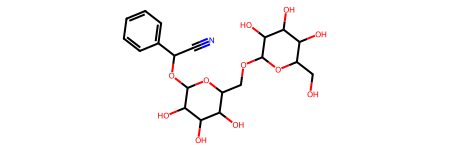

In [23]:
# Rdkit is used for visualising molecules in their real shape
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(dataset.smiles[0])  # converts the SMILES string in the dataset to Molecule
molecule

In [24]:
type(molecule)

rdkit.Chem.rdchem.Mol

In [25]:
# We will build a class that inherits from torch.nn.Module  ( with its in-built structure)
import torch
from torch.nn import Linear # for performing a linear transformation on the input data
# it is used in NN to project the input data to a new space governed by weights and biases
import torch.nn.functional as F # torch.nn.functional is a toolkit for nn's consisting of loss functions, activation functions ,etc
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embedding_size = 64

class GCN(torch.nn.Module):
  def __init__(self):   # constructor of the GCN class
  # Now we will call the contructor of the parent class torch.nn.module
    super(GCN, self).__init__()
    torch.manual_seed(42)

    #GCN layers
    self.initial_conv = GCNConv(dataset.num_features, embedding_size)  # first GCN layer which processes the input features
    self.conv1 = GCNConv(embedding_size, embedding_size) # input and output embedding size
    self.conv2 = GCNConv(embedding_size, embedding_size)
    self.conv3 = GCNConv(embedding_size, embedding_size)

    # output layer
    self.out = Linear(2*embedding_size, 1)  # gmp and gap are concatenated
  def forward(self, x, edge_index, batch_index): # x is the node features of your graph
    # first conv layer                           # edge_index = connection of edges
    hidden = self.initial_conv(x,edge_index )              # batch_index = which nodes belong to which graph
    hidden = F.tanh(hidden)
    # Other conv layers
    hidden = self.conv1(hidden, edge_index)
    hidden = F.tanh(hidden)
    hidden = self.conv2(hidden, edge_index)
    hidden = F.tanh(hidden)
    hidden = self.conv3(hidden, edge_index)
    hidden - F.tanh(hidden)
    # Global Pooling
    # stack different aggregations
    hidden = torch.cat([gmp(hidden,batch_index),gap(hidden,batch_index)], dim = 1)    # Returns batch-wise graph-level-outputs by taking the channel-wise
                                                                                      # maximum across the node dimension.
    # Apply a final linear classifier
    out = self.out(hidden)
    return out, hidden

model = GCN()
print(model)

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)


In [26]:
print( "No. of parameters : {}".format(sum(p.numel() for p in model.parameters())))

No. of parameters : 13249


# **TRAINING**

In [27]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Root mean squared error
mse = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0007)

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [30]:
model = model.to(device)

In [31]:
# Wrap data in a loader
data_size = len(dataset)
num_graphs_per_batch = 64
Loader = DataLoader(dataset[:int(data_size*0.8)], batch_size = num_graphs_per_batch, shuffle = True)
ValLoader = DataLoader(dataset[int(data_size*0.8):int(data_size*0.9)], batch_size = num_graphs_per_batch, shuffle = True)
TestLoader = DataLoader(dataset[int(data_size*0.9):], batch_size = num_graphs_per_batch, shuffle = True)

In [33]:
def train(dataset):
  model.train()
  for batch in Loader:
    batch.to(device)
    optimizer.zero_grad()
    # passing the node features and connection info
    # forward pass
    pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)   # unpacking into 2 variables
    loss = mse(pred, batch.y)
    loss.backward()  # Calculates gradients
    optimizer.step()  # updates the parameters using the calculated gradients
  return loss.item(),embedding

def validate(ValLoader):
  model.eval()
  val_loss = 0.0
  with torch.no_grad():
    for batch in ValLoader:
      batch.to(device)
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
      loss = mse(pred, batch.y)
      val_loss += loss.item()
      val_loss /= len(ValLoader)
  return val_loss



  print("Starting training..")
train_losses = []
val_losses = []
for epoch in range(2000):
  train_loss,h = train(dataset)   # h are the embeddings
  train_losses.append(train_loss)
  val_loss = validate(ValLoader)
  val_losses.append(val_loss)
  if epoch%100==0:
    print(f"Epoch {epoch} |   Train Loss {train_loss}   |    Validation Loss {val_loss}")


Epoch 0 |   Train Loss 10.099656105041504   |    Validation Loss 3.3124107122421265
Epoch 100 |   Train Loss 0.7967323660850525   |    Validation Loss 0.9220696985721588
Epoch 200 |   Train Loss 0.4805862009525299   |    Validation Loss 0.8655951023101807
Epoch 300 |   Train Loss 0.6116620898246765   |    Validation Loss 0.7185283303260803
Epoch 400 |   Train Loss 0.4156852662563324   |    Validation Loss 0.7121057361364365
Epoch 500 |   Train Loss 0.6477764844894409   |    Validation Loss 0.6074101328849792
Epoch 600 |   Train Loss 0.49396684765815735   |    Validation Loss 0.612003356218338
Epoch 700 |   Train Loss 0.21474678814411163   |    Validation Loss 0.4947803020477295
Epoch 800 |   Train Loss 0.264352947473526   |    Validation Loss 0.5492172390222549
Epoch 900 |   Train Loss 0.19119061529636383   |    Validation Loss 0.44058121740818024
Epoch 1000 |   Train Loss 0.07432744652032852   |    Validation Loss 0.42949078977108
Epoch 1100 |   Train Loss 0.05991722643375397   |    V

#**Visualising the training loss using seaborn**

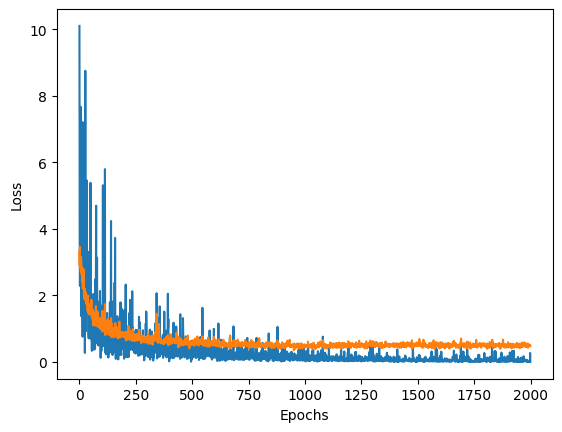

In [39]:
import seaborn as sns
loss_indices = [i for i,l in enumerate(train_losses)]
plt = sns.lineplot(x=loss_indices, y=train_losses)
plt.set(xlabel = "Epochs", ylabel = "Loss")
plt2 = sns.lineplot(x=loss_indices, y=val_losses)

# **Checking on test dataset**

In [40]:
import pandas as pd
test_batch = next(iter(TestLoader))
test_batch.to(device)
with torch.no_grad():
  pred, embedding = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
  df = pd.DataFrame()
  df['y_real'] = test_batch.y.tolist()
  df['y_pred'] = pred.tolist()
df['y_real']  = df['y_real'].apply(lambda row: row[0])
df['y_pred'] = df['y_pred'].apply(lambda row: row[0])
df


,y_real,y_pred
0,-0.400,-0.761782
1,-1.210,-1.539821
2,-1.340,-1.660373
3,-3.370,-3.319162
4,-2.460,-2.262365
...,...,...
59,-3.900,-3.625201
60,-1.470,-1.483460
61,-4.900,-4.320014
62,1.020,1.472258


<Axes: xlabel='y_real', ylabel='y_pred'>

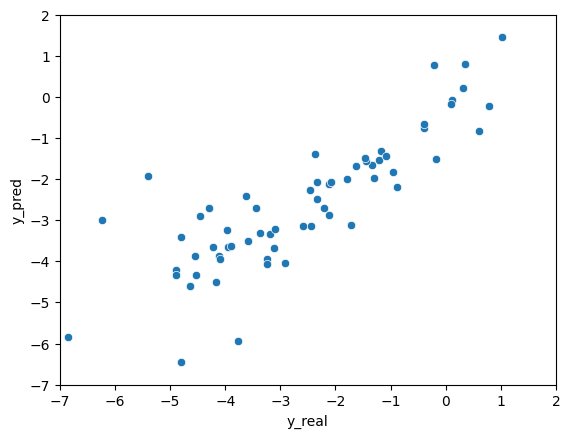

In [41]:
plt = sns.scatterplot(data = df, x = 'y_real', y = 'y_pred')
plt.set(xlim = (-7,2), ylim = (-7,2))
plt

#**We have achieved decent performance on the prediction of water solubility values for the ESOL dataset**